# Project: Investigate Titanic Dataset

Description of Project: <br>
In this project, I will conduct my own data analysis and document my findings. The dataset used in this project is Titanic Data form Kaggle, containing demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic.<br><br>
Goal: <br>
1. What factors made people more likely to survive? 

Notebook Structure: <br>
1. Load data and see how the data looks like
2. Data cleaning:
   * Drop unnecessary factors
   * Check if there are missing values in the dataset
3. Filling missing values
4. Discover the relationship between variables
   * Correlation between survival and other variables
   * Visualized analysing
5. Limitations
6. Conclusion

# Load Data from CSVs

In [67]:
# Import packages needed for this project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read data set into notebook
titanic_df = pd.read_csv('titanic-data.csv')
titanic_df.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Some initial insights out of the variables in this dataset:
* "PassengerId" is like numeric index and seems not very important.
* "Survived" is categorical and dependent variable. 
* "Pclass" should have a strong relationship with "Fare", which can be checked by correlation.
* "SibSp" indicates the number of siblings and spouse abord the Titanic.
* "Parch" indicates the number of parents and children aboard the Titanic.
* Embarked indicates in which port the passengers embarked, where C = Cherbourg, Q = Queenstown, S = Southampton.
* Intuitively, "Survived" may dependents on "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare". 

# Data Cleaning

## Drop columns

According to the initial insights, we can drop the PassangerId column. Based on my knowledge, I cannot extract more useful information from the Ticket and Cabin columns, so I will also drop them for now.

In [68]:
# Drop columns
titanic_df = titanic_df.drop(['PassengerId', 'Ticket', 'Cabin'], axis = 1)
titanic_df.head() 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


## Check missing values

In [69]:
# Get some information about this data frame
titanic_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


In [70]:
# Checking for total null values
titanic_df.isnull().sum() 

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

So, Age and Embarked columns contain missing values, especially for age.

# Filling Missing Values

## Age

In [71]:
# Get statistical summary for variable Age
age = titanic_df['Age'] 
age.describe() 

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Now, we got some insights about factor age. As we saw earlier, the Age factor has 177 null values. We can replace these missing values with the mean age, but the ages are from 0 to 80. That means lots of people have different ages. So the better idea will be based on the title in names. Calulate respectively mean values for different title groups, and then assign missing values with the mean value based on their groups.

In [72]:
titanic_df['Title']=0
for i in titanic_df:
    titanic_df['Title']=titanic_df.Name.str.extract('([A-Za-z]+)\.', expand=True) # Using regular expression to extract the title in names. (eg. Mr.) 

In [73]:
# Checking the Titles with the Sex
pd.crosstab(titanic_df.Title, titanic_df.Sex).T

Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


To make it easier, I need to replace some special title with more common ones.

In [74]:
# Replace special titles with common ones.
titanic_df['Title'].replace(['Capt','Col','Countess','Don','Jonkheer','Lady','Major','Mlle','Mme','Ms','Rev','Sir'],
                            ['Mr','Other','Mrs','Mr','Other','Mrs','Mr','Miss','Miss','Miss','Other','Mr'],inplace=True)
# Create a cross table for Title and Sex
pd.crosstab(titanic_df.Title, titanic_df.Sex).T

Title,Dr,Master,Miss,Mr,Mrs,Other
Sex,,,,,,
female,1,0,186,0,127,0
male,6,40,0,522,0,9


In [75]:
# lets check the average age by Title 
titanic_df.groupby('Title')['Age'].mean() 

Title
Dr        42.000000
Master     4.574167
Miss      21.860000
Mr        32.601737
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [76]:
# Now filling missing values with respective group mean
titanic_df.loc[(titanic_df.Age.isnull())&(titanic_df.Title=='Dr'),'Age']=42
titanic_df.loc[(titanic_df.Age.isnull())&(titanic_df.Title=='Master'),'Age']=5
titanic_df.loc[(titanic_df.Age.isnull())&(titanic_df.Title=='Miss'),'Age']=22
titanic_df.loc[(titanic_df.Age.isnull())&(titanic_df.Title=='Mr'),'Age']=33
titanic_df.loc[(titanic_df.Age.isnull())&(titanic_df.Title=='Mrs'),'Age']=36
titanic_df.loc[(titanic_df.Age.isnull())&(titanic_df.Title=='Other'),'Age']=46

In [77]:
# Check if there is any missing values left
titanic_df.Age.isnull().any() 

False

##  Embarked

In [78]:
# Get statistical summary for variable Embarked
embarked = titanic_df['Embarked'] 
embarked.describe() 

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

Now, we can see that most passengers boarded from Port S. So, we can replace missing values with "S".

In [79]:
# Replace missing values with "S"
titanic_df.loc[(titanic_df.Embarked.isnull()), 'Embarked'] = "S"

In [80]:
# Check if there is any missing values left
titanic_df.Embarked.isnull().any() 

False

# Discover the Relationship

## Correlation between survival and other variables

Before calculating correlation, we need to change the values in Sex and Embarked columns to numeric.

In [81]:
# Drop unnecessary columns
titanic_df = titanic_df.drop(['Name', 'Title'], axis = 1)

In [82]:
# Change values in columns Sex and Embarked to numeric.
titanic_df.replace(to_replace="male", value=0, inplace=True)
titanic_df.replace(to_replace="female", value=1, inplace=True)
titanic_df.replace(to_replace="C", value=1, inplace=True)
titanic_df.replace(to_replace="Q", value=2, inplace=True)
titanic_df.replace(to_replace="S", value=3, inplace=True)
titanic_df.head() 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,3
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,3
3,1,1,1,35.0,1,0,53.1000,3
4,0,3,0,35.0,0,0,8.0500,3


In [83]:
# Create new variable names for each column to make calculation later more clear.
survived = titanic_df['Survived']
pclass = titanic_df['Pclass']
sex = titanic_df['Sex']
age = titanic_df['Age']
sibsp = titanic_df['SibSp']
parch = titanic_df['Parch']
fare = titanic_df['Fare']
embarked = titanic_df['Embarked']

In [84]:
# define a function for correlation calculating
def correlation(x, y):
    x_std = (x - x.mean()) / x.std(ddof=0)
    y_std = (y - y.mean()) / y.std(ddof=0)
    correlation = (x_std * y_std).mean()
    return correlation

In [85]:
# Calculate correlations between survived and each variable.
cor_pclass = correlation(pclass, survived)
cor_sex = correlation(sex, survived)
cor_age = correlation(age, survived)
cor_sibsp = correlation(sibsp, survived)
cor_parch = correlation(parch, survived)
cor_fare = correlation(fare, survived)
cor_embarked = correlation(embarked, survived)
correlation_df = pd.DataFrame({'Pclass': [cor_pclass],
                               'Sex': [cor_sex],
                               'Age': [cor_age],
                               'Sibsp': [cor_sibsp],
                               'Parch': [cor_parch],
                               'Fare': [cor_fare],
                               'Embarked': [cor_embarked]})
print(correlation_df)

        Age  Embarked      Fare     Parch    Pclass       Sex     Sibsp
0 -0.092058 -0.167675  0.257307  0.081629 -0.338481  0.543351 -0.035322


In [86]:
# Calculate correlation between Pclass and Fare.
correlation(pclass, fare)

-0.5494996199439044

From the correlation between each factor and survival, we can see that the most correlated factor should be sex. <br>
I'll do some visualizations about some factors to give more visualized comparison and trend.

## Visualized analysing 

Based on the correlation calculated above, I choose two most related factors to analyse, which are sex and pclass.
Since "Pclass" have a strong relationship with "Fare", so I'll just analyse Pclass.

### Sex

In [87]:
# Change the numeric value in Sex back to characters.
titanic_df['Sex'].replace(0, 'male', inplace=True)
titanic_df['Sex'].replace(1, 'female', inplace=True)
titanic_df.head() 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,3
1,1,1,female,38.0,1,0,71.2833,1
2,1,3,female,26.0,0,0,7.9250,3
3,1,1,female,35.0,1,0,53.1000,3
4,0,3,male,35.0,0,0,8.0500,3


In [88]:
# Calculate survival number by sex.
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

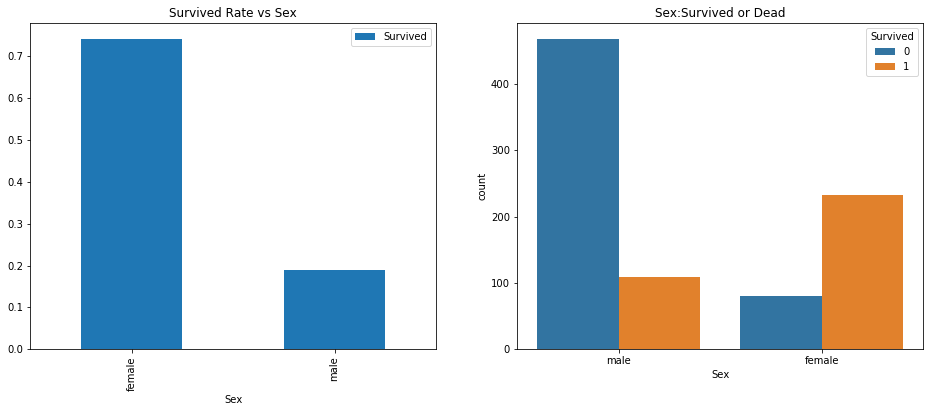

In [89]:
# Create 2 plots in same row
f,ax=plt.subplots(1,2,figsize=(16,6))
# Plot survival rate by Sex
titanic_df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived Rate vs Sex')
# Plot number of survival and dead by Sex
sns.countplot('Sex',hue='Survived',data=titanic_df,ax=ax[1])
ax[1].set_title('Sex:Survived or Dead')
plt.show()

The plots clearly show us the survival rate of female is pretty hight (73%), which is much higher than male (20%). However, the total number of male member is much more than female (almost twice of the number of female). 

### Pclass

In [90]:
# Calculate survival number by Pclass
titanic_df.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

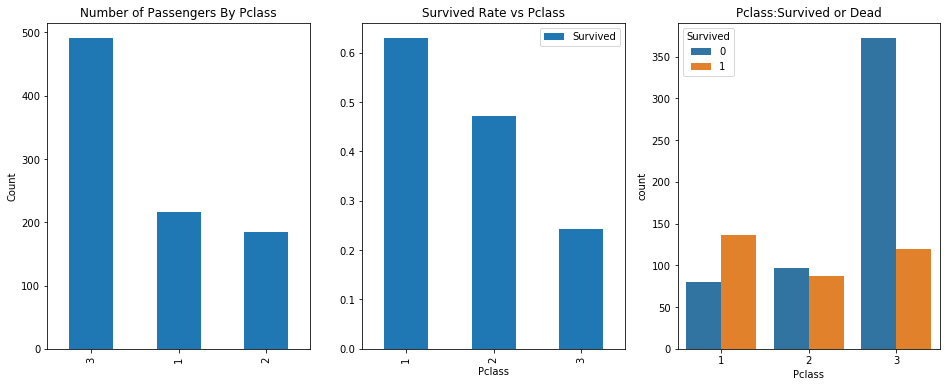

In [91]:
# Create 3 plots in same row
f,ax=plt.subplots(1,3,figsize=(16,6))
# Plot number of Passengers by Pclass
titanic_df['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
# Plot survival rate by Pclass
titanic_df[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar(ax=ax[1])
ax[1].set_title('Survived Rate vs Pclass')
# Plot number of survival and dead by Pclass
sns.countplot('Pclass',hue='Survived',data=titanic_df,ax=ax[2])
ax[2].set_title('Pclass:Survived or Dead')
plt.show()

The plots show that almost half member are from 3rd Pclass, but the survival rate of 3rd Pclass is only 25%. Survival rates of 2nd and 1st Pclass are around 47% and 63%, which are much bigger than 3rd Pclass. The third plot clearly show the comparison and it shocked me.

### Sex & Pclass

I would like to see what will happen if we combine factors sex and pclass.

In [92]:
# Calculate survival number by Sex and then by Pclass
titanic_df.groupby(['Sex','Pclass','Survived'])['Survived'].count()

Sex     Pclass  Survived
female  1       0             3
                1            91
        2       0             6
                1            70
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: Survived, dtype: int64

From the data, we can see that female from 1st Pclass has the most number of survival, while male from 3rd Pclass has the most number of died. 

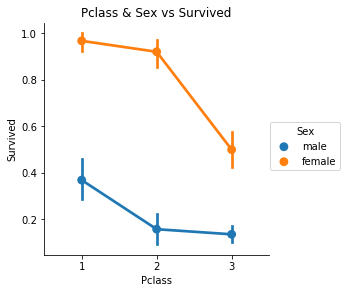

In [93]:
# Plot survival rate by Pclass and Sex
sns.factorplot(data=titanic_df, x='Pclass', y='Survived', hue='Sex')
plt.title('Pclass & Sex vs Survived')
plt.show() 

The plot gives us the consistent results as we concluded before.

# Limitations

* It is hard to perfectly fill the missing values for Age.
* How to fill missing values for Cabin? Will it be a big problem in the long run?

# Conclusion

From the correlation and all plots we did, we can conclude the following:
* Survival rate is mostly related to sex and pclass.
* Female is much more likely to survive than male.
* People from 1st pclass is much more likely to survive than 2nd and 3rd pclass, especially 3rd pclass.
* Female from 1st pclass has the biggest chance to survive.
* Male from 3rd pclass has the smallest chance to survive.

## Reference

* https://www.kaggle.com/c/titanic/kernels
* https://www.kaggle.com/ash316/eda-to-prediction-dietanic